In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)

# Display the first few rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop the last two columns
df = df.iloc[:, :-2]

# Verify the change
print(df.head())  # Display the first few rows
print(df.columns)  # Show remaining column names


         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_loan_status  \
0     13.99       123.03     C        C4  ...                  NaN   
1     11.99       820.28     C        C1  ...                  NaN   
2     10.78       432.66     B        B4  ...                  NaN   
3     14.85       829.90     C        C5  ...                  NaN   
4     22.45       289.91     F        F1  ...                  NaN   

  orig_projected_additional_accrued_interest hardship_payoff_balance_amount  \
0                        

In [13]:
# Summary statistics for numerical columns
summary_stats = df.describe(include="all")

# Count of missing values per column
missing_values = df.isnull().sum()

# Display results
print(summary_stats)
print("\nMissing Values:")
print(missing_values)


                id  member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count    2260701.0        0.0  2.260668e+06  2.260668e+06     2.260668e+06   
unique   2260701.0        NaN           NaN           NaN              NaN   
top     68407277.0        NaN           NaN           NaN              NaN   
freq           1.0        NaN           NaN           NaN              NaN   
mean           NaN        NaN  1.504693e+04  1.504166e+04     1.502344e+04   
std            NaN        NaN  9.190245e+03  9.188413e+03     9.192332e+03   
min            NaN        NaN  5.000000e+02  5.000000e+02     0.000000e+00   
25%            NaN        NaN  8.000000e+03  8.000000e+03     8.000000e+03   
50%            NaN        NaN  1.290000e+04  1.287500e+04     1.280000e+04   
75%            NaN        NaN  2.000000e+04  2.000000e+04     2.000000e+04   
max            NaN        NaN  4.000000e+04  4.000000e+04     4.000000e+04   

              term      int_rate   installment    grade sub_gra

(2260701, 149)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade'],
      dtype='object')
float64    111
object      38
Name: count, dtype: int64
member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
payment_plan_start_date                       2249784
hardship_start_date                           2249784
hardship_type                                 2249784
hardship_reason                               2249784
hardship_status                               2249784
hardship_last_payment_amount                  2249784
hardship_payoff_balance_amount                2249784
hardship_loan_status                          2249784
hardship_dpd                                  2249784
deferral_term                                 2249784
hardship_length                               2249784
hardship_amount                               2249784
hardship_end_

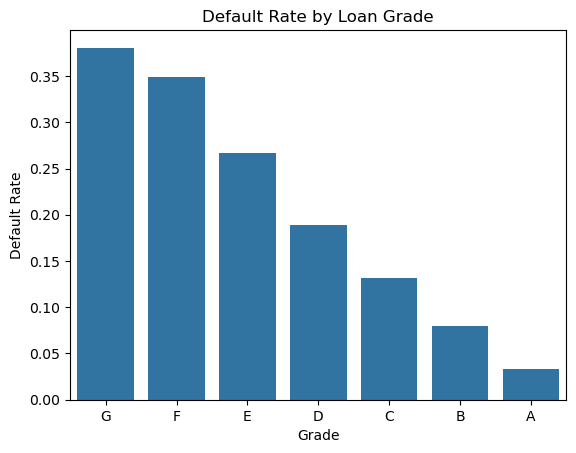

          loan_amnt      int_rate    annual_inc           dti
count  2.260668e+06  2.260668e+06  2.260664e+06  2.258957e+06
mean   1.504693e+04  1.309283e+01  7.799243e+04  1.882420e+01
std    9.190245e+03  4.832138e+00  1.126962e+05  1.418333e+01
min    5.000000e+02  5.310000e+00  0.000000e+00 -1.000000e+00
25%    8.000000e+03  9.490000e+00  4.600000e+04  1.189000e+01
50%    1.290000e+04  1.262000e+01  6.500000e+04  1.784000e+01
75%    2.000000e+04  1.599000e+01  9.300000e+04  2.449000e+01
max    4.000000e+04  3.099000e+01  1.100000e+08  9.990000e+02


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# See size and structure
print(df.shape)
print(df.columns[:10])  # See first 10 column names
print(df.dtypes.value_counts())  # Count of types (object, float, etc.)

# Null counts
nulls = df.isnull().sum().sort_values(ascending=False)
print(nulls[nulls > 0].head(20))  # Top 20 most null-heavy columns

# Look at target column
print(df['loan_status'].value_counts())

# Visualize default rates by grade
df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
default_rate = df.groupby('grade')['is_default'].mean().sort_values(ascending=False)

sns.barplot(x=default_rate.index, y=default_rate.values)
plt.title('Default Rate by Loan Grade')
plt.ylabel('Default Rate')
plt.xlabel('Grade')
plt.show()

# Summary stats
print(df[['loan_amnt', 'int_rate', 'annual_inc', 'dti']].describe())
